## Análisis de Datos de Temperatura

- Fecha: 2024-08-06
- Coder: LeninGF
- Objetivo: realizar la isnpección sobre los datos recolectados a través del API de openweather y usando la configuración de Linux para el registro de los mismos

In [1]:
import os
import pandas as pd
os.listdir(os.getcwd())

['.#clima-quito-hoy.csv.backup',
 '#clima-quito-hoy.csv.backup#',
 'clima-quito-hoy.csv.backup',
 'ejemplo.sh',
 'ejemplo.sh~',
 'get-weather.sh~',
 '.ipynb_checkpoints',
 'clima-quito-hoy-etl.csv',
 'main.py',
 'CityTemperatureAnalysis.ipynb',
 'output.log',
 'registro.log',
 'main.py~',
 'clima-quito-hoy.csv',
 'get-weather.sh']

### Lectura de Datos
Lectura del archivo csv con *with open* debido a que openweather coloca valores sobre la lluvia y la nieve cuando éstos están disponibles por lo que en este caso he obtenido 30 campos de lectura obviando los referidos. Esto puede solventarse incluyendo los campos con valor NaN por defecto en el programa de Python para captura de información

In [2]:
import csv
csv_file = 'clima-quito-hoy.csv'
filtered_rows = []
with open(csv_file, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row)==30:
            filtered_rows.append(row)
len(filtered_rows)

58

In [3]:
header = filtered_rows[0]
data = filtered_rows[1:]
print(len(header), len(data))

30 57


In [4]:
# df = pd.read_csv('clima-quito-hoy.csv')
df = pd.DataFrame(data, columns=header)
df.shape

(57, 30)

In [5]:
df.sample(5)

,dt,coord_lon,coord_lat,weather_0_id,weather_0_main,weather_0_description,weather_0_icon,base,main_temp,main_feels_like,...,clouds_all,sys_type,sys_id,sys_country,sys_sunrise,sys_sunset,timezone,id,name,cod
16,1722703193,-78.5211,-0.2309,801,Clouds,few clouds,02d,stations,18.66,17.44,...,11,1,8555,EC,1722683820,1722727403,-18000,3652462,Quito,200
56,1722961456,-78.5211,-0.2309,801,Clouds,few clouds,02d,stations,17.66,16.71,...,14,1,8555,EC,1722943004,1722986587,-18000,3652462,Quito,200
33,1722824020,-78.5211,-0.2309,802,Clouds,scattered clouds,03n,stations,9.66,9.66,...,37,1,8555,EC,1722770215,1722813798,-18000,3652462,Quito,200
55,1722960744,-78.5211,-0.2309,801,Clouds,few clouds,02d,stations,17.66,16.71,...,14,1,8555,EC,1722943004,1722986587,-18000,3652462,Quito,200
32,1722823136,-78.5249,-0.2299,802,Clouds,scattered clouds,03n,stations,9.53,9.53,...,38,1,8555,EC,1722770216,1722813799,-18000,3652462,Quito,200


### Análisis de Datos
- Se procede a realizar un plot de variables de interés según el tiempo capturado. La primera columna contiene la información del API sobre tiempo en formato **Timestamp**, misma que se puede convertir a **datetime**.
- Debido al proceso utilizado para guardar los datos `dt` tiene como tipo de dato objeto por lo que es necesario convertirlo a entero. De igual manera existen otras variables capturadas que en este caso por la lectura con `with open` se detectan como object en vez de sus tipos de datos correctos


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dt                     57 non-null     object
 1   coord_lon              57 non-null     object
 2   coord_lat              57 non-null     object
 3   weather_0_id           57 non-null     object
 4   weather_0_main         57 non-null     object
 5   weather_0_description  57 non-null     object
 6   weather_0_icon         57 non-null     object
 7   base                   57 non-null     object
 8   main_temp              57 non-null     object
 9   main_feels_like        57 non-null     object
 10  main_temp_min          57 non-null     object
 11  main_temp_max          57 non-null     object
 12  main_pressure          57 non-null     object
 13  main_humidity          57 non-null     object
 14  main_sea_level         57 non-null     object
 15  main_grnd_level        57

In [7]:
df.dt = df.dt.astype(int)
df.sys_sunrise = df.sys_sunrise.astype(int)
df.sys_sunset = df.sys_sunset.astype(int)
for column in df.columns:
    try:
        df[column] = pd.to_numeric(df[column])
    except ValueError:
        next

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dt                     57 non-null     int64  
 1   coord_lon              57 non-null     float64
 2   coord_lat              57 non-null     float64
 3   weather_0_id           57 non-null     int64  
 4   weather_0_main         57 non-null     object 
 5   weather_0_description  57 non-null     object 
 6   weather_0_icon         57 non-null     object 
 7   base                   57 non-null     object 
 8   main_temp              57 non-null     float64
 9   main_feels_like        57 non-null     float64
 10  main_temp_min          57 non-null     float64
 11  main_temp_max          57 non-null     float64
 12  main_pressure          57 non-null     int64  
 13  main_humidity          57 non-null     int64  
 14  main_sea_level         57 non-null     int64  
 15  main_grn

In [9]:
from datetime import datetime
df_etl = df.copy()
df_etl.dt = df.dt.apply(lambda x: datetime.fromtimestamp(x))
df_etl.sys_sunrise = df.sys_sunrise.apply(lambda x: datetime.fromtimestamp(x))
df_etl.sys_sunset = df.sys_sunset.apply(lambda x: datetime.fromtimestamp(x))
df_etl.sample(5)

,dt,coord_lon,coord_lat,weather_0_id,weather_0_main,weather_0_description,weather_0_icon,base,main_temp,main_feels_like,...,clouds_all,sys_type,sys_id,sys_country,sys_sunrise,sys_sunset,timezone,id,name,cod
32,2024-08-04 20:58:56,-78.5249,-0.2299,802,Clouds,scattered clouds,03n,stations,9.53,9.53,...,38,1,8555,EC,2024-08-04 06:16:56,2024-08-04 18:23:19,-18000,3652462,Quito,200
2,2024-08-03 00:15:02,-78.5249,-0.2299,803,Clouds,broken clouds,04n,stations,8.53,8.53,...,68,1,8555,EC,2024-08-03 06:17:01,2024-08-03 18:23:24,-18000,3652462,Quito,200
10,2024-08-03 02:25:15,-78.5211,-0.2309,802,Clouds,scattered clouds,03n,stations,7.66,6.91,...,25,1,8555,EC,2024-08-03 06:17:00,2024-08-03 18:23:23,-18000,3652462,Quito,200
24,2024-08-03 22:10:16,-78.5211,-0.2309,804,Clouds,overcast clouds,04n,stations,8.66,8.66,...,97,1,8555,EC,2024-08-03 06:17:00,2024-08-03 18:23:23,-18000,3652462,Quito,200
9,2024-08-03 02:13:58,-78.5249,-0.2299,802,Clouds,scattered clouds,03n,stations,7.53,6.77,...,26,1,8555,EC,2024-08-03 06:17:01,2024-08-03 18:23:24,-18000,3652462,Quito,200


Generalmente es de interés realizar un breve análisis estadístico de las variables del dataset

In [10]:
df_etl.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
dt,57,2024-08-04 12:15:59.859649280,2024-08-02 23:45:02,2024-08-03 11:09:10,2024-08-04 09:54:14,2024-08-05 00:30:02,2024-08-06 11:24:16,NaN
coord_lon,57.0,-78.523509,-78.525,-78.5249,-78.5249,-78.5211,-78.5211,0.001856
coord_lat,57.0,-0.230268,-0.2309,-0.2309,-0.2299,-0.2299,-0.2299,0.000487
weather_0_id,57.0,801.982456,800.0,801.0,802.0,803.0,804.0,1.17247
main_temp,57.0,12.139298,5.53,8.53,9.66,15.53,21.66,4.640032
main_feels_like,57.0,11.520526,4.49,8.53,9.66,14.0,20.82,4.30918
main_temp_min,57.0,12.139298,5.53,8.53,9.66,15.53,21.66,4.640032
main_temp_max,57.0,12.139298,5.53,8.53,9.66,15.53,21.66,4.640032
main_pressure,57.0,1017.473684,1012.0,1016.0,1018.0,1019.0,1020.0,2.307637
main_humidity,57.0,69.140351,32.0,50.0,84.0,92.0,94.0,23.497294


In [11]:
df_etl.to_csv('clima-quito-hoy-etl.csv', index=False)

### Presentación de Resultados

Se procede a realizar gráficas de interés para estudiar el comportamiento climatológico

Text(0.5, 1.0, 'Main Temp vs Time in Quito')

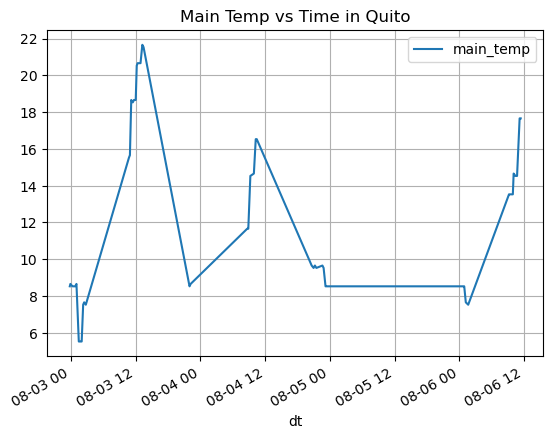

In [12]:
import matplotlib.pyplot as plt

df_etl.plot.line('dt', 'main_temp')
plt.grid()
plt.title(f'Main Temp vs Time in {next(iter(set(df_etl.name)))}')

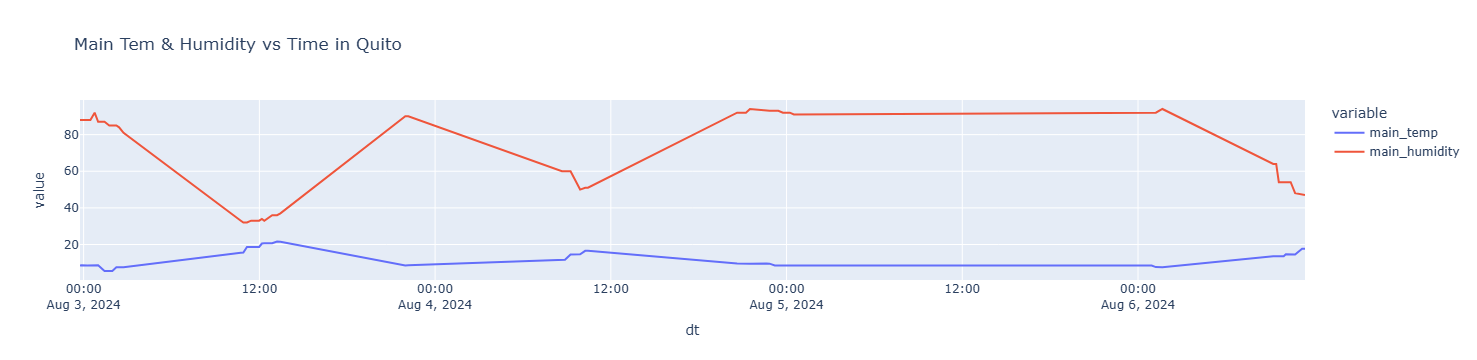

In [18]:
import plotly_express as px
fig = px.line(df_etl, x='dt', y=['main_temp', 'main_humidity'], title=f"Main Tem & Humidity vs Time in {next(iter(set(df_etl.name)))}")
fig.show()

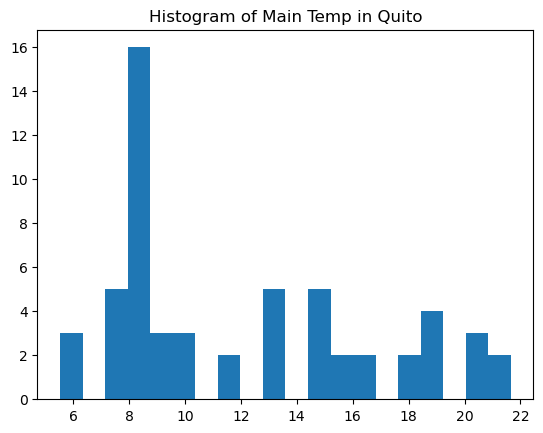

In [14]:
df_etl.main_temp.hist(bins=20)
plt.title(f'Histogram of Main Temp in {next(iter(set(df_etl.name)))}')
plt.grid()

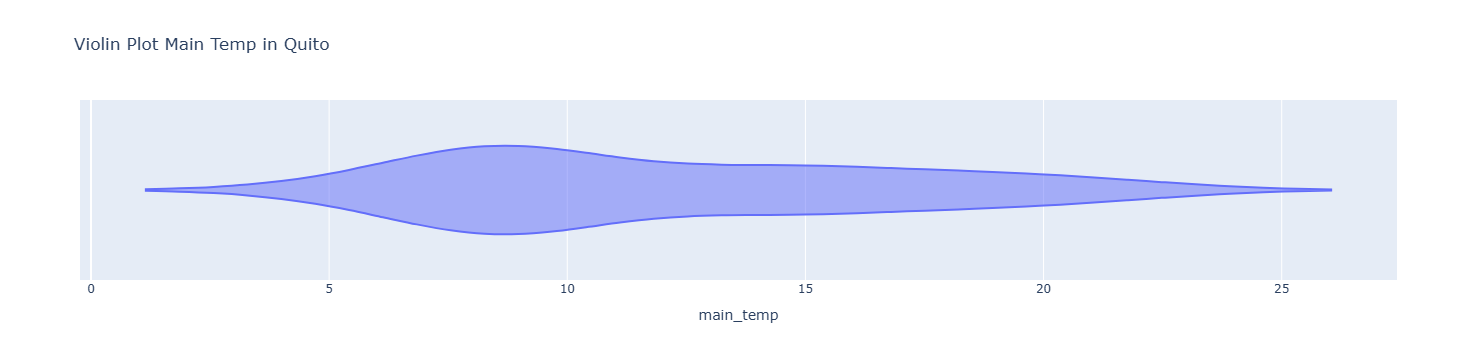

In [19]:
fig = px.violin(df_etl, 'main_temp', title=f"Violin Plot Main Temp in {next(iter(set(df_etl.name)))}")
fig.show()